## Hook callbacks

This provides both a standalone class and a callback for registering and automatically deregistering [PyTorch hooks](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks), along with some pre-defined hooks. Hooks can be attached to any [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), for either the forward or the backward pass.

We'll start by looking at the pre-defined hook [`ActivationStats`](/callbacks.hooks.html#ActivationStats), then we'll see how to create our own.

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.callbacks.hooks import * 
from fastai.train import *
from fastai.vision import *

In [ ]:
show_doc(ActivationStats)

<h2 id="ActivationStats" class="doc_header"><code>class</code> <code>ActivationStats</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L82" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ActivationStats-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>ActivationStats</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`modules`**:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=***`None`***, **`do_remove`**:`bool`=***`True`***) :: [`HookCallback`](/callbacks.hooks.html#HookCallback)

<div class="collapse" id="ActivationStats-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ActivationStats-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>ActivationStats</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Callback that record the mean and std of activations.  

[`ActivationStats`](/callbacks.hooks.html#ActivationStats) saves the layer activations in `self.stats` for all `modules` passed to it. By default it will save activations for *all* modules. For instance:

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
#learn = cnn_learner(data, models.resnet18, callback_fns=ActivationStats)
learn = Learner(data, simple_cnn((3,16,16,2)), callback_fns=ActivationStats)
learn.fit(1)

epoch,train_loss,valid_loss,time
0,0.142666,0.101166,00:03


The saved `stats` is a `FloatTensor` of shape `(2,num_modules,num_batches)`. The first axis is `(mean,stdev)`.

In [ ]:
len(learn.data.train_dl),len(learn.activation_stats.modules)

(193, 3)

In [ ]:
learn.activation_stats.stats.shape

torch.Size([2, 3, 193])

So this shows the standard deviation (`axis0==1`) of 2th last layer (`axis1==-2`) for each batch (`axis2`):

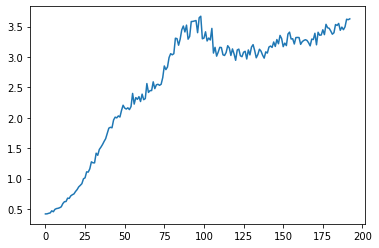

In [ ]:
plt.plot(learn.activation_stats.stats[1][-2].numpy());

### Internal implementation

In [ ]:
show_doc(ActivationStats.hook)

<h4 id="ActivationStats.hook" class="doc_header"><code>hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L90" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ActivationStats-hook-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>hook</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`i`**:`Tensors`, **`o`**:`Tensors`) → `Tuple`\[`Rank0Tensor`, `Rank0Tensor`\]

<div class="collapse" id="ActivationStats-hook-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ActivationStats-hook-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>hook</code>:</p><p>Some other tests where <code>hook</code> is used:</p><ul><li><code>pytest -sv tests/test_callbacks_hooks.py::test_hook_output_basics</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L74" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Take the mean and std of `o`.  

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(ActivationStats.on_train_begin)

<h4 id="ActivationStats.on_train_begin" class="doc_header"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L85" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ActivationStats-on_train_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_begin</code>(**\*\*`kwargs`**)

<div class="collapse" id="ActivationStats-on_train_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ActivationStats-on_train_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Initialize stats.  

In [ ]:
show_doc(ActivationStats.on_batch_end)

<h4 id="ActivationStats.on_batch_end" class="doc_header"><code>on_batch_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L93" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ActivationStats-on_batch_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_batch_end</code>(**`train`**, **\*\*`kwargs`**)

<div class="collapse" id="ActivationStats-on_batch_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ActivationStats-on_batch_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_batch_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Take the stored results and puts it in `self.stats`  

In [ ]:
show_doc(ActivationStats.on_train_end)

<h4 id="ActivationStats.on_train_end" class="doc_header"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L96" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#ActivationStats-on_train_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_end</code>(**\*\*`kwargs`**)

<div class="collapse" id="ActivationStats-on_train_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#ActivationStats-on_train_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Polish the final result.  

In [ ]:
show_doc(Hook)

<h2 id="Hook" class="doc_header"><code>class</code> <code>Hook</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L10" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Hook-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>Hook</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`hook_func`**:`HookFunc`, **`is_forward`**:`bool`=***`True`***, **`detach`**:`bool`=***`True`***)

<div class="collapse" id="Hook-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Hook-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>Hook</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create a hook on `m` with `hook_func`.  

Registers and manually deregisters a [PyTorch hook](https://pytorch.org/tutorials/beginner/former_torchies/nn_tutorial.html#forward-and-backward-function-hooks). Your `hook_func` will be called automatically when forward/backward (depending on `is_forward`) for your module `m` is run, and the result of that function is placed in `self.stored`.

In [ ]:
show_doc(Hook.remove)

<h4 id="Hook.remove" class="doc_header"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L25" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Hook-remove-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>remove</code>()

<div class="collapse" id="Hook-remove-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Hook-remove-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>remove</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Remove the hook from the model.  

Deregister the hook, if not called already.

In [ ]:
show_doc(Hooks)

<h2 id="Hooks" class="doc_header"><code>class</code> <code>Hooks</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L34" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Hooks-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>Hooks</code>(**`ms`**:`ModuleList`, **`hook_func`**:`HookFunc`, **`is_forward`**:`bool`=***`True`***, **`detach`**:`bool`=***`True`***)

<div class="collapse" id="Hooks-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Hooks-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>Hooks</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create several hooks on the modules in `ms` with `hook_func`.  

Acts as a `Collection` (i.e. `len(hooks)` and `hooks[i]`) and an `Iterator` (i.e. `for hook in hooks`) of a group of hooks, one for each module in `ms`, with the ability to remove all as a group. Use `stored` to get all hook results. `hook_func` and `is_forward` behavior is the same as [`Hook`](/callbacks.hooks.html#Hook). See the source code for [`HookCallback`](/callbacks.hooks.html#HookCallback) for a simple example.

In [ ]:
show_doc(Hooks.remove)

<h4 id="Hooks.remove" class="doc_header"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L45" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Hooks-remove-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>remove</code>()

<div class="collapse" id="Hooks-remove-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Hooks-remove-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>remove</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Remove the hooks from the model.  

Deregister all hooks created by this class, if not previously called.

## Convenience functions for hooks

In [ ]:
show_doc(hook_output)

<h4 id="hook_output" class="doc_header"><code>hook_output</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L54" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#hook_output-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>hook_output</code>(**`module`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`detach`**:`bool`=***`True`***, **`grad`**:`bool`=***`False`***) → [`Hook`](/callbacks.hooks.html#Hook)

<div class="collapse" id="hook_output-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#hook_output-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>hook_output</code>:</p><ul><li><code>pytest -sv tests/test_callbacks_hooks.py::test_hook_output_basics</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L74" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Return a [`Hook`](/callbacks.hooks.html#Hook) that stores activations of `module` in `self.stored`  

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for `module` that simply stores the output of the layer.

In [ ]:
show_doc(hook_outputs)

<h4 id="hook_outputs" class="doc_header"><code>hook_outputs</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L58" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#hook_outputs-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>hook_outputs</code>(**`modules`**:`ModuleList`, **`detach`**:`bool`=***`True`***, **`grad`**:`bool`=***`False`***) → [`Hooks`](/callbacks.hooks.html#Hooks)

<div class="collapse" id="hook_outputs-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#hook_outputs-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>hook_outputs</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Return [`Hooks`](/callbacks.hooks.html#Hooks) that store activations of all `modules` in `self.stored`  

Function that creates a [`Hook`](/callbacks.hooks.html#Hook) for all passed `modules` that simply stores the output of the layers. For example, the (slightly simplified) source code of [`model_sizes`](/callbacks.hooks.html#model_sizes) is:

```python
def model_sizes(m, size):
    x = m(torch.zeros(1, in_channels(m), *size))
    return [o.stored.shape for o in hook_outputs(m)]
```

In [ ]:
show_doc(model_sizes)

<h4 id="model_sizes" class="doc_header"><code>model_sizes</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L110" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#model_sizes-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>model_sizes</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`size`**:`tuple`=***`(64, 64)`***) → `Tuple`\[`Sizes`, `Tensor`, [`Hooks`](/callbacks.hooks.html#Hooks)\]

<div class="collapse" id="model_sizes-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#model_sizes-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>model_sizes</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Pass a dummy input through the model `m` to get the various sizes of activations.  

In [ ]:
show_doc(model_summary)

<h4 id="model_summary" class="doc_header"><code>model_summary</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L165" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#model_summary-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>model_summary</code>(**`m`**:[`Learner`](/basic_train.html#Learner), **`n`**:`int`=***`70`***)

<div class="collapse" id="model_summary-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#model_summary-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>Tests found for <code>model_summary</code>:</p><ul><li><code>pytest -sv tests/test_basic_train.py::test_export_load_learner</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_basic_train.py#L216" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_callbacks_hooks.py::test_model_summary_collab</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L48" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_callbacks_hooks.py::test_model_summary_tabular</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L33" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_callbacks_hooks.py::test_model_summary_text</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L26" class="source_link" style="float:right">[source]</a></li><li><code>pytest -sv tests/test_callbacks_hooks.py::test_model_summary_vision</code> <a href="https://github.com/fastai/fastai/blob/master/tests/test_callbacks_hooks.py#L18" class="source_link" style="float:right">[source]</a></li></ul><p>To run tests please refer to this <a href="/dev/test.html#quick-guide">guide</a>.</p></div></div>

Print a summary of `m` using a output text width of `n` chars  

This method only works on a [`Learner`](/basic_train.html#Learner) object with `train_ds` in it. If it was created as a result of [`load_learner`](/basic_train.html#load_learner), there is no [`data`](/vision.data.html#vision.data) to run through the model and therefore it's not possible to create such summary.

A sample `summary` looks like:

```
======================================================================
Layer (type)         Output Shape         Param #    Trainable 
======================================================================
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
ReLU                 [64, 176, 176]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
...
```

Column definition:

1. **Layer (type)** is the name of the corresponding [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module).

2. **Output Shape** is the shape of the output of the corresponding layer (minus the batch dimension, which is always the same and has no impact on the model params).

3. **Param #** is the number of weights (and optionally bias), and it will vary for each layer.

   The number of params is calculated differently for each layer type. Here is how it's calculated for some of the most common layer types:

    * Conv: `kernel_size*kernel_size*ch_in*ch_out`
    * Linear: `(n_in+bias) * n_out`
    * Batchnorm: `2 * n_out`
    * Embeddings: `n_embed * emb_sz`

4. **Trainable** indicates whether a layer is trainable or not.

   * Layers with `0` parameters are always Untrainable (e.g., `ReLU` and `MaxPool2d`).
   * Other layers are either Trainable or not, usually depending on whether they are frozen or not. See [Discriminative layer training](https://docs.fast.ai/basic_train.html#Discriminative-layer-training).

To better understand this summary it helps to also execute `learn.model` and correlate the two outputs.

Example:

Let's feed to a [`Learner`](/basic_train.html#Learner) a dataset of 3-channel images size 352x352 and look at the model and its summary:

```
data.train_ds[0][0].data.shape
learn = cnn_learner(data, models.resnet34, ...)
print(learn.model)
print(learn.summary())
```
Here are the outputs with everything but the relevant to the example lines removed:

```
torch.Size([3, 352, 352])

    [...]
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    [...]
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    [...]
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): Linear(in_features=512, out_features=37, bias=True)


======================================================================
Layer (type)         Output Shape         Param #    Trainable 
======================================================================
Conv2d               [64, 176, 176]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 176, 176]       128        True      
______________________________________________________________________
[...]
MaxPool2d            [64, 88, 88]         0          False    
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
[...]
______________________________________________________________________
Linear               [37]                 18,981     True

```

**So let's calculate some params:**

For the `Conv2d` layers, multiply the first 4 numbers from the corresponding layer definition:

```
Conv2d(3, 64, kernel_size=(7, 7), ...)

3*64*7*7 = 9,408

Conv2d(64, 64, kernel_size=(3, 3), ...)

64*64*3*3 = 36,864
```

For the `BatchNorm2d` layer, multiply the first number by 2:
```
BatchNorm2d(64, ...)
64*2 = 128
```

For `Linear` we multiply the first 2 and include the bias if it's `True`:

```
Linear(in_features=512, out_features=37, bias=True)

(512+1)*37 = 18,981
```

**Now let's calculate some output shapes:**

We started with 3x352x352 image and run it through this layer:

`Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)`

How did we get: `[64, 176, 176]`

The number of output channels is `64`, that's the first dimension in the number above. And then our image of `352x352` got convolved into `176x176` because of stride `2x2` (`352/2`).

Then we had:

`MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)`

which reduced `[64, 176, 176]` to `[64, 88, 88]` again because of stride 2.

And so on, finishing with:

`Linear(in_features=512, out_features=37, bias=True)`

which reduced everything to just `[37]`.

In [ ]:
jekyll_warn("Known issue: `model_summary` and `Learner.summary` don't work with the AWD LSTM in text models.")

<div markdown="span" class="alert alert-danger" role="alert"><i class="fa fa-danger-circle"></i> <b>Warning: </b>Known issue: `model_summary` and `Learner.summary` don't work with the AWD LSTM in text models.</div>

In [ ]:
show_doc(num_features_model)

<h4 id="num_features_model" class="doc_header"><code>num_features_model</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L116" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#num_features_model-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>num_features_model</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)) → `int`

<div class="collapse" id="num_features_model-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#num_features_model-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>num_features_model</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Return the number of output features for `model`.  

It can be useful to get the size of each layer of a model (e.g. for printing a summary, or for generating cross-connections for a [`DynamicUnet`](/vision.models.unet.html#DynamicUnet)), however they depend on the size of the input. This function calculates the layer sizes by passing in a minimal tensor of `size`.

In [ ]:
show_doc(dummy_batch)

<h4 id="dummy_batch" class="doc_header"><code>dummy_batch</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L101" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#dummy_batch-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>dummy_batch</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`size`**:`tuple`=***`(64, 64)`***) → `Tensor`

<div class="collapse" id="dummy_batch-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#dummy_batch-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>dummy_batch</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Create a dummy batch to go through `m` with `size`.  

In [ ]:
show_doc(dummy_eval)

<h4 id="dummy_eval" class="doc_header"><code>dummy_eval</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L106" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#dummy_eval-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>dummy_eval</code>(**`m`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`size`**:`tuple`=***`(64, 64)`***)

<div class="collapse" id="dummy_eval-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#dummy_eval-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>dummy_eval</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Pass a [`dummy_batch`](/callbacks.hooks.html#dummy_batch) in evaluation mode in `m` with `size`.  

In [ ]:
show_doc(HookCallback)

<h2 id="HookCallback" class="doc_header"><code>class</code> <code>HookCallback</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L62" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#HookCallback-pytest" style="float:right; padding-right:10px">[test]</a></h2>

> <code>HookCallback</code>(**`learn`**:[`Learner`](/basic_train.html#Learner), **`modules`**:`Sequence`\[[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module)\]=***`None`***, **`do_remove`**:`bool`=***`True`***) :: [`LearnerCallback`](/basic_train.html#LearnerCallback)

<div class="collapse" id="HookCallback-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#HookCallback-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>HookCallback</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Callback that can be used to register hooks on `modules`. Implement the corresponding function in `self.hook`.  

For all `modules`, uses a callback to automatically register a method `self.hook` (that you must define in an inherited class) as a hook. This method must have the signature:

```python
def hook(self, m:Model, input:Tensors, output:Tensors)
```

If `do_remove` then the hook is automatically deregistered at the end of training. See [`ActivationStats`](/callbacks.hooks.html#ActivationStats) for a simple example of inheriting from this class.

### Callback methods

You don't call these yourself - they're called by fastai's [`Callback`](/callback.html#Callback) system automatically to enable the class's functionality.

In [ ]:
show_doc(HookCallback.on_train_begin)

<h4 id="HookCallback.on_train_begin" class="doc_header"><code>on_train_begin</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L68" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#HookCallback-on_train_begin-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_begin</code>(**\*\*`kwargs`**)

<div class="collapse" id="HookCallback-on_train_begin-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#HookCallback-on_train_begin-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_begin</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Register the [`Hooks`](/callbacks.hooks.html#Hooks) on `self.modules`.  

In [ ]:
show_doc(HookCallback.on_train_end)

<h4 id="HookCallback.on_train_end" class="doc_header"><code>on_train_end</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L74" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#HookCallback-on_train_end-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>on_train_end</code>(**\*\*`kwargs`**)

<div class="collapse" id="HookCallback-on_train_end-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#HookCallback-on_train_end-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>on_train_end</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Remove the [`Hooks`](/callbacks.hooks.html#Hooks).  

## Undocumented Methods - Methods moved below this line will intentionally be hidden

In [ ]:
show_doc(HookCallback.remove)

<h4 id="HookCallback.remove" class="doc_header"><code>remove</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L78" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#HookCallback-remove-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>remove</code>()

<div class="collapse" id="HookCallback-remove-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#HookCallback-remove-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>remove</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

In [ ]:
show_doc(Hook.hook_fn)

<h4 id="Hook.hook_fn" class="doc_header"><code>hook_fn</code><a href="https://github.com/fastai/fastai/blob/master/fastai/callbacks/hooks.py#L18" class="source_link" style="float:right">[source]</a><a class="source_link" data-toggle="collapse" data-target="#Hook-hook_fn-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>hook_fn</code>(**`module`**:[`Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module), **`input`**:`Tensors`, **`output`**:`Tensors`)

<div class="collapse" id="Hook-hook_fn-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#Hook-hook_fn-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>hook_fn</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Applies `hook_func` to `module`, `input`, `output`.  

## New Methods - Please document or move to the undocumented section